In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def cross_entropy(y, p):
    return -y * np.log(p) - (1 - y) * np.log(1 - p)

In [6]:
heart_df = pd.read_csv("framingham.csv")


In [3]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [44]:

heart_df.drop(['education'], axis=1, inplace=True)

# Xem dữ liệu sau khi loại bỏ cột education
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# Tạo biến phụ thuộc
y = heart_df['TenYearCHD']

# Tạo biến độc lập
X = heart_df.drop('TenYearCHD', axis=1)

In [66]:
def logistic_regression(X, y):
    w = np.random.rand(X.shape[1])
    b = np.random.rand()

    w = w[:X.shape[1]]
    for _ in range(1000):
        # Tính giá trị dự đoán của mô hình
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Tính loss function
        loss = np.sum(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))

        # Cập nhật trọng số và bias của mô hình
        w = w - 0.01 * np.dot(X.T, (y_pred - y))
        b = b - 0.01 * np.sum(y_pred - y)

    return w, b

# Huấn luyện mô hình
w, b = logistic_regression(X, y)

C:\Users\FPT\AppData\Local\Temp\ipykernel_25352\1021579340.py:12: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))


In [81]:
x = np.array([1,39,4,0,0,0,0,195,106,70,26.97,80,77,0])
y_pred = sigmoid(np.dot(x, w) + b)
print(y_pred)

nan


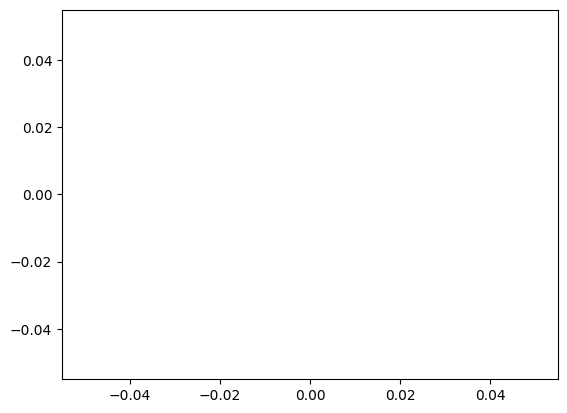

In [82]:
# labels = ["Có khả năng bị bệnh tim", "Không có khả năng bị bệnh tim"]
# plt.plot(y_pred_list, label=labels)

# plt.show()